In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_normal = pd.read_csv('../datasets/topics_processed.csv')
df_normal.head()

,name,sent_mean,sent_mean_discrete,support_left,support_right,con_pos,con_neg,controversy,controversy_discrete,mass,entropy
0,"['game', 'player', 'team', 'bank']",0.159481,0.449805,-0.328824,0.637618,0.520565,0.267771,0.966442,0.797675,224.835494,0.848684
1,"['ukraine', 'russian', 'putin', 'russia']",0.043706,0.244451,-0.546230,0.440634,0.073032,0.627517,0.986864,0.940244,102.913744,0.956455
2,"['school', 'teacher', 'university', 'education']",0.134642,0.358611,-0.346081,0.609520,0.447156,0.314623,0.955601,0.871398,75.144517,0.905135
3,"['czech', 'republic', 'czech republic', 'prague']",0.127740,0.398022,-0.453120,0.548294,0.352129,0.438642,1.001415,0.841578,70.340426,0.882496
4,"['doctor', 'hospital', 'patient', 'nurse']",0.094570,0.351329,-0.446196,0.462169,0.175294,0.468688,0.908365,0.876568,60.076751,0.909034


In [3]:
df_weighted_linear = pd.read_csv('../datasets/topics_processed_linear.csv')
df_weighted_linear.head()

,name,sent_mean,sent_mean_discrete,support_left,support_right,con_pos,con_neg,controversy,controversy_discrete,mass,entropy
0,"['czech', 'ukraine', 'russian', 'putin']",0.114677,0.347359,-0.493625,0.576873,0.379725,0.490859,1.070498,0.879342,825.734037,0.911123
1,"['babi', 'vote', 'election', 'president']",0.113783,0.366262,-0.438540,0.532701,0.320338,0.439652,0.971241,0.865852,791.127474,0.900944
2,"['doctor', 'hospital', 'life', 'patient']",0.079374,0.280335,-0.486687,0.498801,0.229799,0.521399,0.985488,0.921412,439.059011,0.942544
3,"['tax', 'inflation', 'pay', 'money']",0.103977,0.384266,-0.407009,0.514643,0.283001,0.418865,0.921652,0.852340,457.750070,0.890696
4,"['book', 'time', 'read', 'understand']",0.083403,0.286957,-0.526689,0.538830,0.289756,0.553623,1.065519,0.917656,387.294894,0.939758


In [4]:
df_weighted_sqrt = pd.read_csv('../datasets/topics_processed_sqrt.csv')
df_weighted_sqrt.head()

,name,sent_mean,sent_mean_discrete,support_left,support_right,con_pos,con_neg,controversy,controversy_discrete,mass,entropy
0,"['czech', 'ostrava', 'ukraine', 'russian']",0.121342,0.392862,-0.377135,0.525314,0.266151,0.346318,0.902449,0.845660,717.549991,0.885610
1,"['game', 'player', 'team', 'bank']",0.144545,0.417174,-0.353272,0.601568,0.472973,0.269736,0.954840,0.825966,407.547305,0.870540
2,"['babi', 'vote', 'election', 'president']",0.127513,0.393134,-0.364543,0.546367,0.324022,0.315735,0.910911,0.845446,664.340933,0.885447
3,"['inflation', 'tax', 'pay', 'money']",0.118307,0.379414,-0.372136,0.528066,0.265788,0.343145,0.900202,0.856045,578.834281,0.893511
4,"['life', 'mom', 'feel', 'like']",0.135702,0.421646,-0.378651,0.555465,0.360371,0.325505,0.934117,0.822215,397.235822,0.867656


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
0 0
1 0
2 0
0 1
1 1
2 1


/tmp/ipykernel_12037/1355693132.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


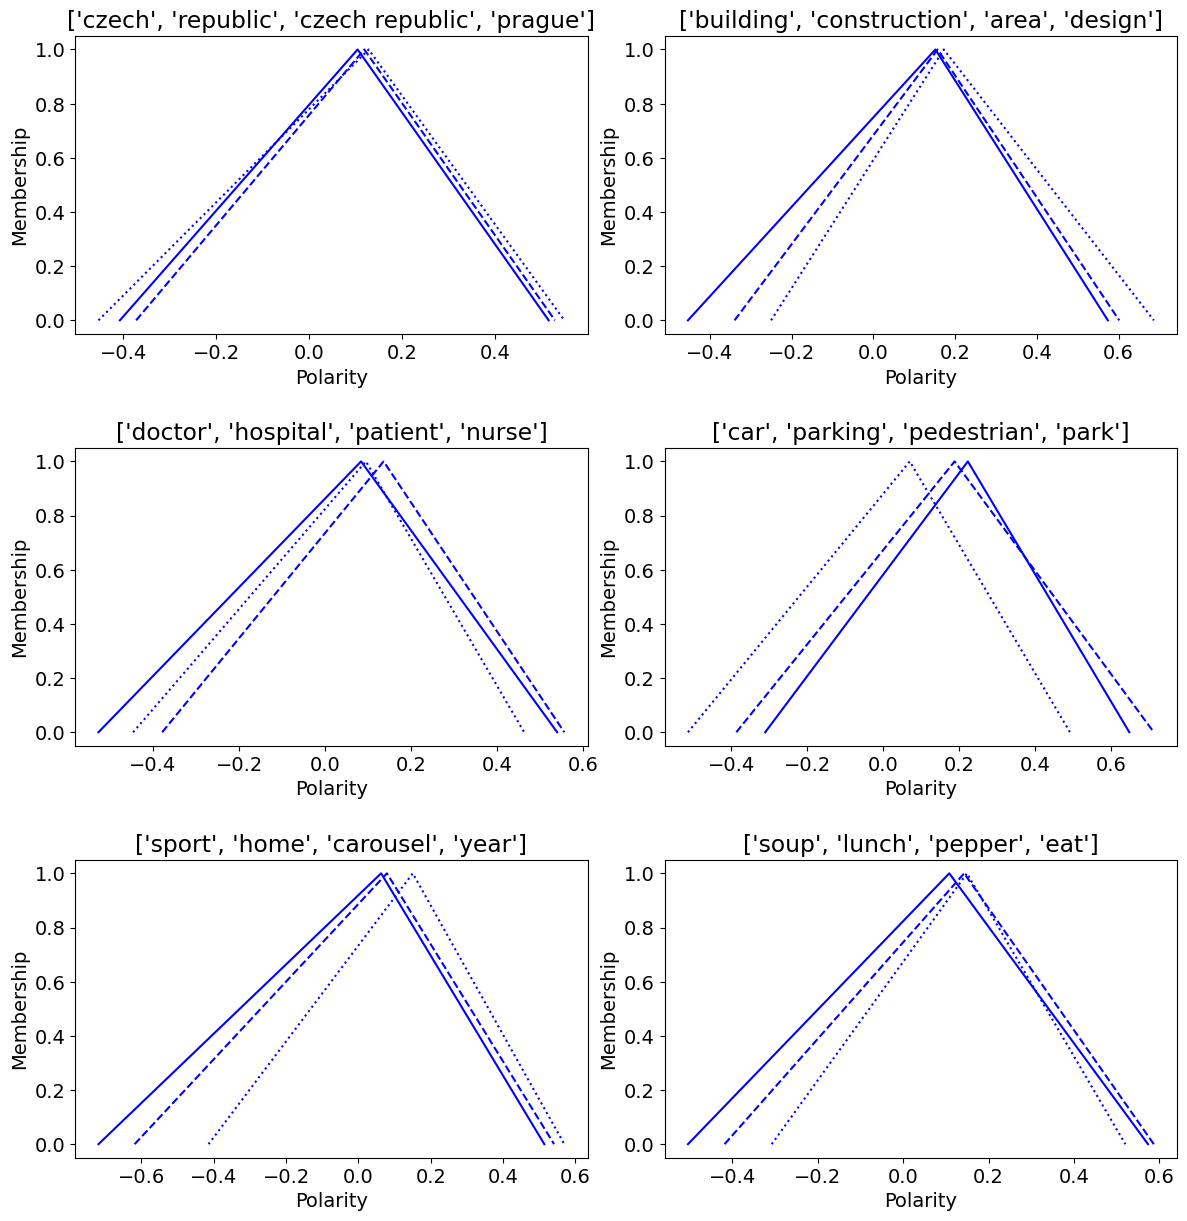

In [15]:
plt.rcParams.update({'font.size': 14})


colors = ['red', 'blue', 'green', 'yellow', 'brown']
f, subbplots = plt.subplots(3, 2)
f.set_figheight(12)
f.set_figwidth(12)
f.tight_layout(h_pad=4)

print(subbplots)


for i in range(6):
    subplot_x = i % 3 
    subplot_y = i // 3
    print(subplot_x, subplot_y)
    row_normal = df_normal.loc[i+3]
    row_weighted_linear = df_weighted_linear.loc[i+3]
    row_weighted_sqrt = df_weighted_sqrt.loc[i+3]
    ax = subbplots[subplot_x, subplot_y]
    ax.set_title(row_normal['name'])
    ax.set_xlabel('Polarity')
    ax.set_ylabel('Membership')
    # ax.title(row_normal['name'])
    ax.plot([row_normal['support_left'], row_normal['sent_mean'], row_normal['support_right']], [0, 1, 0], 

             linestyle='dotted', color='blue')
    ax.plot([row_weighted_linear['support_left'], row_weighted_linear['sent_mean'], 
            row_weighted_linear['support_right']], [0, 1, 0], color='blue')
    ax.plot([row_weighted_sqrt['support_left'], row_weighted_sqrt['sent_mean'], row_weighted_sqrt['support_right']],
             [0, 1, 0], color='blue', linestyle='dashed')

f.show()